<a href="https://colab.research.google.com/github/frostfire05/frostfire_arrives/blob/main/Ridge_LassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RIDGE AND LASSO REGRESSION

In ridge regression lambda is multiplied with (Slope)^2

Helps prevent overfitting and also helps in feature selection.The important parameter of this regression is lambda or alpha which controls the regularization

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
X=dataset
y=df.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [19]:
ridge_regressor = Ridge()

In [20]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCV = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgeCV.fit(X_train,y_train)
print(ridgeCV.best_params_)
print(ridgeCV.best_score_)


{'alpha': 5}
-0.5268179966861514


In [21]:
ridge_predict = ridgeCV.predict(X_test)

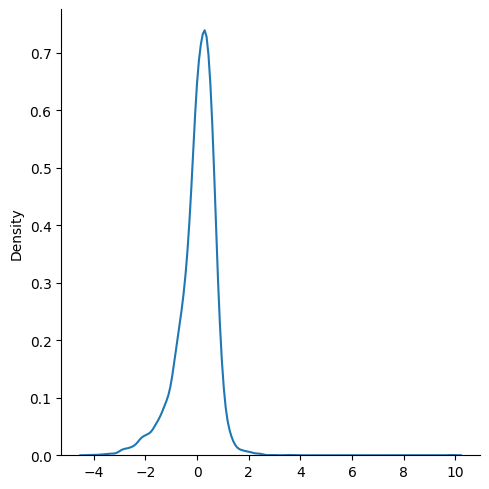

In [24]:
import seaborn as sns
sns.displot(ridge_predict-y_test,kind='kde')

In [26]:
from sklearn.metrics import r2_score
score=r2_score(ridge_predict,y_test)
score

0.34383945441404484

#LASSO REGRESSION


In lasso regression lambda is multiplied with |slope|

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [28]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassoCV = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassoCV.fit(X_train,y_train)
print(lassoCV.best_params_)
print(lassoCV.best_score_)

{'alpha': 1}
-1.3400019579636542


In [30]:
lasso_predict = lassoCV.predict(X_test)
lasso_predict

array([2.06923961, 2.06923961, 2.06923961, ..., 2.06923961, 2.06923961,
       2.06923961])

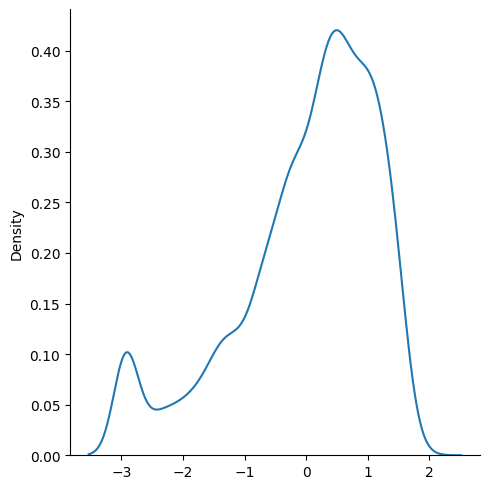

In [31]:
sns.displot(lasso_predict-y_test,kind='kde')